<a href="https://colab.research.google.com/github/varunkr24/Natural-Language-Processing/blob/Python/NLP_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Blog Authorship Corpus
Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multilabel classification problem. Dataset Blog Authorship Corpus

Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labeled for gender and age but for many, industry and/or sign is marked as unknown.)

All bloggers included in the corpus fall into one of three age groups: 8240 "10s" blogs (ages 13-17), 8086 "20s" blogs(ages 23-27) 2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label urllink

Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus

OBJECTIVE: The need is to build a NLP classifier which can use input text parameters to determine the label/s of the blog.

In [1]:
import pandas as pd
import numpy as np 
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.kaggle.com/durgaprasadk10/blog-authorship-corpus-solution

In [4]:
df = pd.read_csv('/content/drive/My Drive/AIML/Projects/blogtext.csv')

In [5]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [6]:
df.shape

(681284, 7)

In [7]:
df.sample(5)

,id,gender,age,topic,sign,date,text
670254,3755025,female,15,Student,Libra,"12,July,2004",YAY! its raingin sooo hard at my house....
333958,3818898,male,24,Consulting,Leo,"12,July,2004",Have you ever taken a step back and loo...
624791,3579377,male,15,indUnk,Aries,"20,July,2004",heres the pic of the week sorry its la...
137977,3974013,female,23,Student,Cancer,"24,November,2003",urlLink On a building overlooking G...
35199,3169212,female,15,Student,Cancer,"01,August,2004","Excuse me, Jack, I know you don't know ..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [9]:
df.gender.value_counts()

male      345193
female    336091
Name: gender, dtype: int64

In [10]:
df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

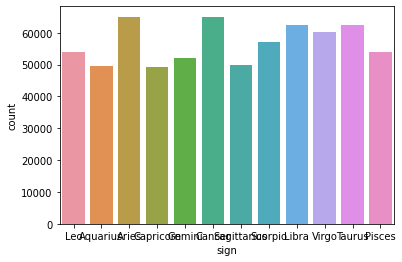

In [11]:
sns.countplot(x='sign',data=df)

**Preprocess rows of the “text” column**  
a. Remove unwanted characters

b. Convert text to lowercase

c. Remove unwanted spaces

d. Remove stopwords

In [12]:
pattern = "[^\w ]"
df.text = df.text.apply(lambda s : re.sub(pattern,"",s))

In [13]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...


In [14]:
#covert text to lower
df.text = df.text.apply(lambda s: s.lower())

In [15]:
#remove unwanted spaces
df.text = df.text.apply(lambda s: s.strip())

In [16]:
#remove stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stopwords= set(stopwords.words('english'))

In [18]:
df.text = df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [19]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [20]:
# drop id and date columns
df.drop(labels=['id','date'], axis=1, inplace = True)